In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.style.use('seaborn-colorblind')
bboxprops = {'facecolor':'white', 'pad':0.5, 'boxstyle':'round', 'edgecolor':'lightgrey', 'alpha':0.7}

In [6]:
## Read in Excel files of data and question labels
XLS = pd.ExcelFile('../../ComputationSurveyData/LabeledComputationDataColumnRenamed.xlsx')
XLS2 = pd.ExcelFile('../../ComputationSurveyData/Questions.xlsx')

## Parse the appropriate sheets into dataframes
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

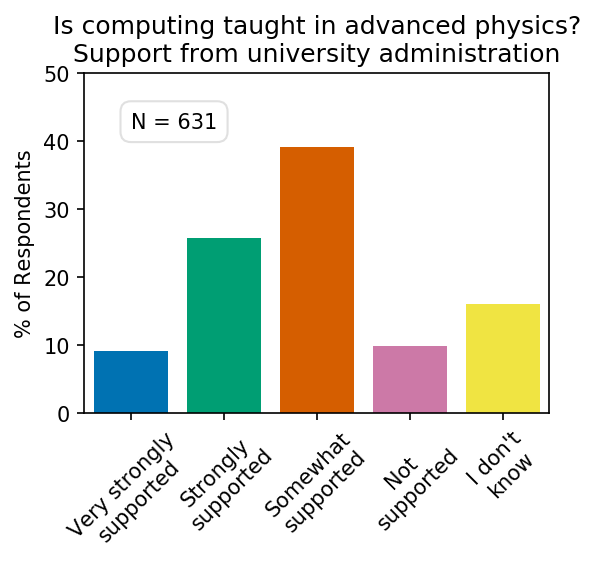

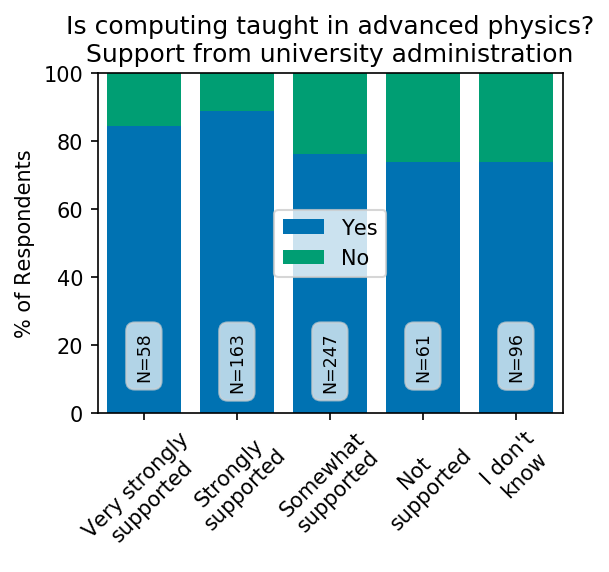

In [160]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q62'
outQuestion = 'Q11'
supportList = []

NteachComp = []
NnoTeachComp = []
PteachComp = []
PnoTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    NteachComp.append(counts[1])
    NnoTeachComp.append(counts[0])
    PteachComp.append(counts[1]/(counts[0]+counts[1])*100)
    PnoTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in advanced physics?\nSupport from university administration')

N1string = 'N = ' + str(sum(supportList));
ax1.text(0, 42, N1string, bbox = bboxprops)

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, PteachComp)
p2 = plt.bar(ind, PnoTeachComp, bottom=PteachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'],loc=10)
plt.title('Is computing taught in advanced physics?\nSupport from university administration')
plt.axis([-.5,4.5,0,100]);

for i in np.arange(0,5):
    ax2.text(i-0.1, 20, 'N=' + str(NteachComp[i]+NnoTeachComp[i]), bbox = bboxprops, fontsize='smaller',rotation=90)

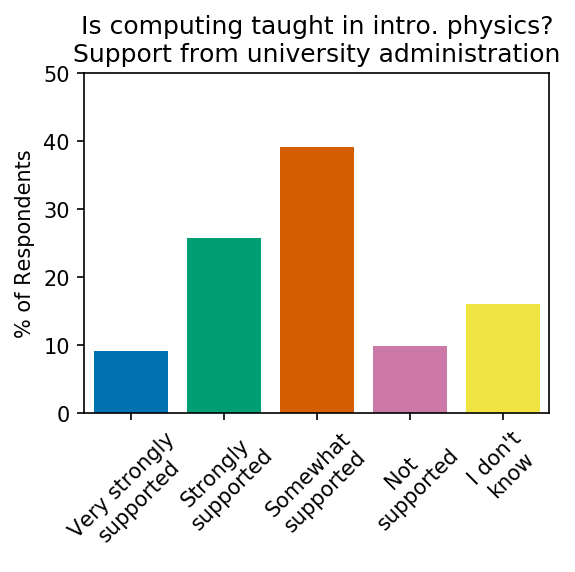

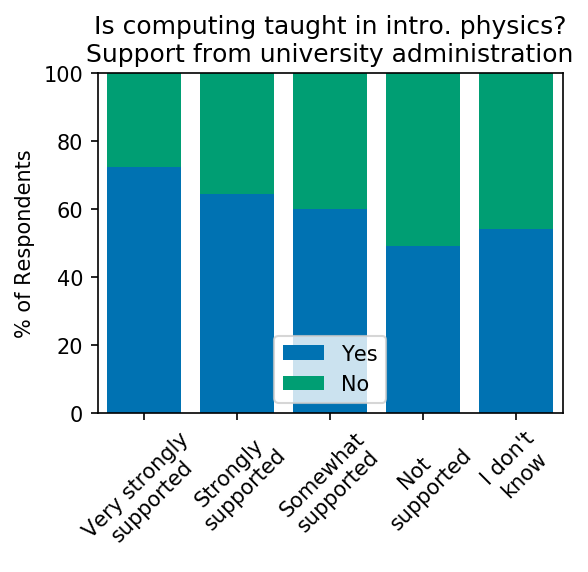

In [123]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q62'
outQuestion = 'Q8'
supportList = []

teachComp = []
noTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    teachComp.append(counts[1]/(counts[0]+counts[1])*100)
    noTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in intro. physics?\nSupport from university administration')

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, teachComp)
p2 = plt.bar(ind, noTeachComp, bottom=teachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'])
plt.title('Is computing taught in intro. physics?\nSupport from university administration')
plt.axis([-.5,4.5,0,100]);

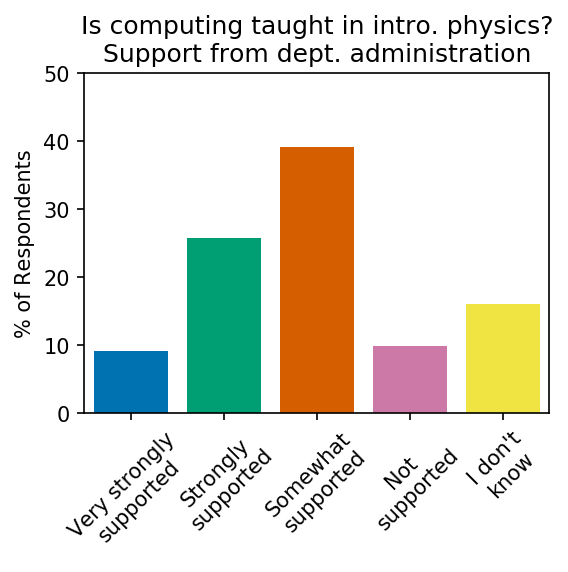

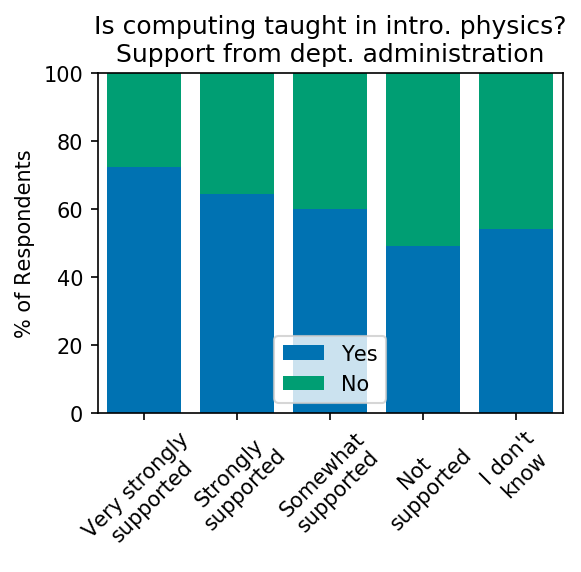

In [124]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q63'
outQuestion = 'Q8'
supportList = []

teachComp = []
noTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    teachComp.append(counts[1]/(counts[0]+counts[1])*100)
    noTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in intro. physics?\nSupport from dept. administration')

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, teachComp)
p2 = plt.bar(ind, noTeachComp, bottom=teachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'])
plt.title('Is computing taught in intro. physics?\nSupport from dept. administration')
plt.axis([-.5,4.5,0,100]);

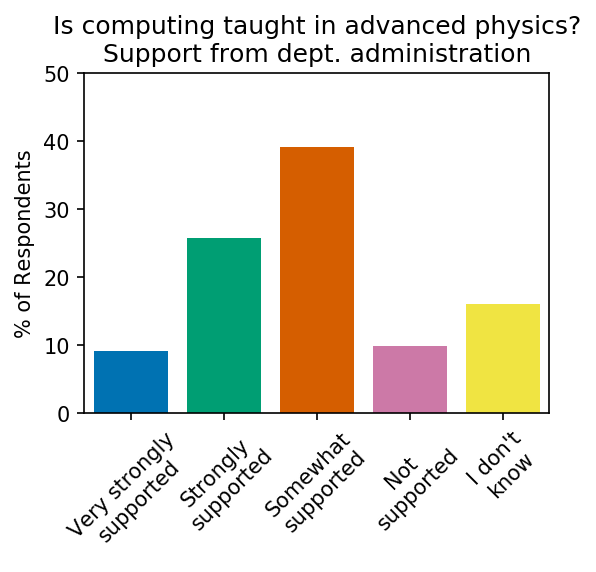

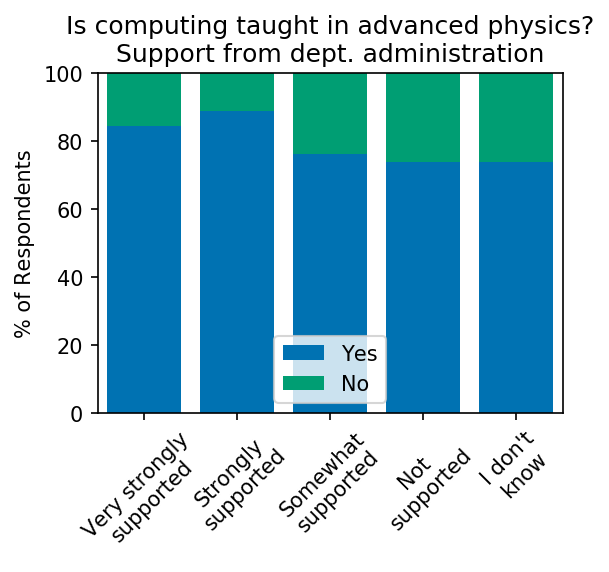

In [125]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q63'
outQuestion = 'Q11'
supportList = []

teachComp = []
noTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    teachComp.append(counts[1]/(counts[0]+counts[1])*100)
    noTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in advanced physics?\nSupport from dept. administration')

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, teachComp)
p2 = plt.bar(ind, noTeachComp, bottom=teachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'])
plt.title('Is computing taught in advanced physics?\nSupport from dept. administration')
plt.axis([-.5,4.5,0,100]);

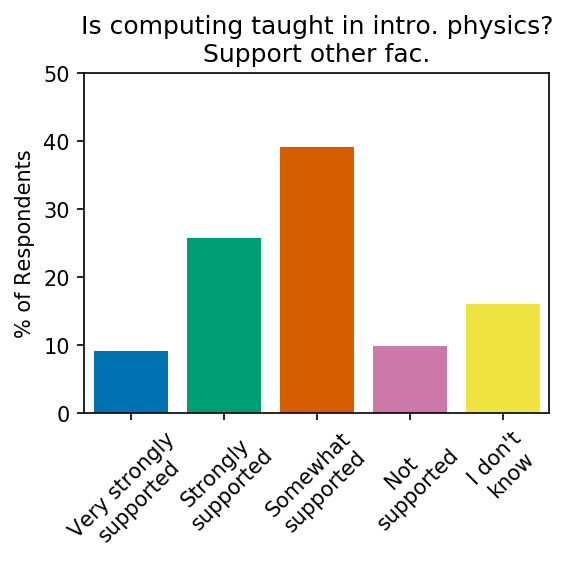

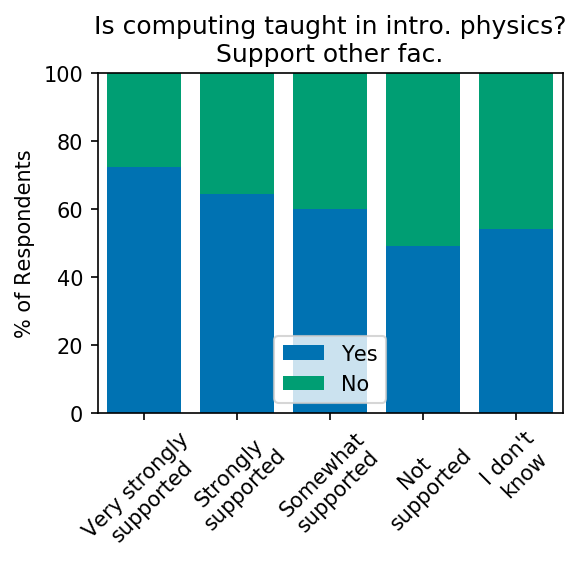

In [126]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q64'
outQuestion = 'Q8'
supportList = []

teachComp = []
noTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    teachComp.append(counts[1]/(counts[0]+counts[1])*100)
    noTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in intro. physics?\nSupport other fac.')

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, teachComp)
p2 = plt.bar(ind, noTeachComp, bottom=teachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'])
plt.title('Is computing taught in intro. physics?\nSupport other fac.')
plt.axis([-.5,4.5,0,100]);

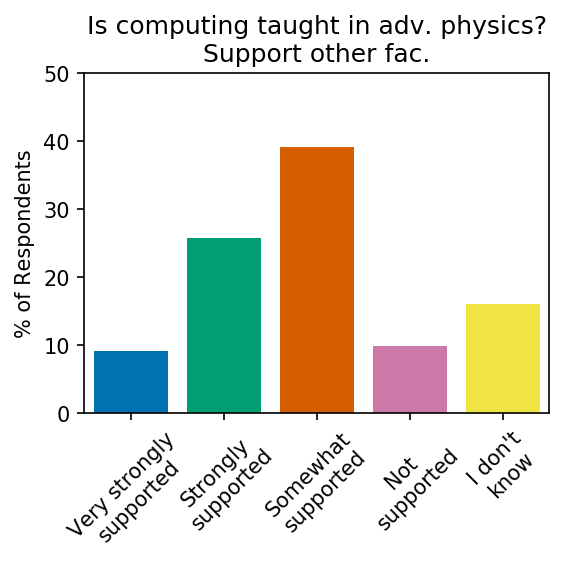

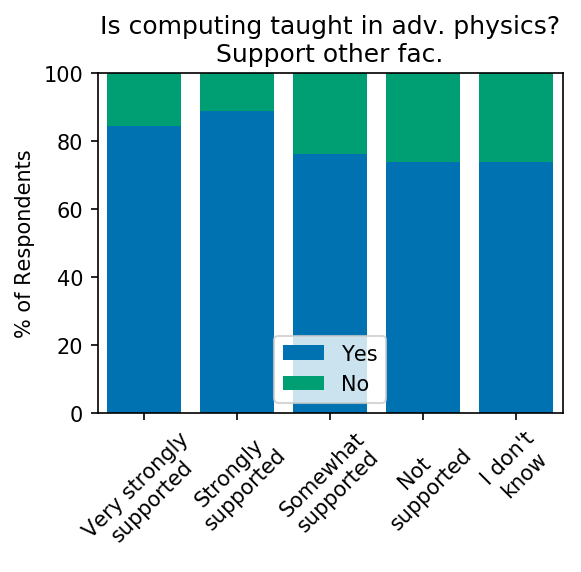

In [127]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q64'
outQuestion = 'Q11'
supportList = []

teachComp = []
noTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    teachComp.append(counts[1]/(counts[0]+counts[1])*100)
    noTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in adv. physics?\nSupport other fac.')

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, teachComp)
p2 = plt.bar(ind, noTeachComp, bottom=teachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'])
plt.title('Is computing taught in adv. physics?\nSupport other fac.')
plt.axis([-.5,4.5,0,100]);